Tenemos el siguiente esquema de datos 


![Picture title](image-20220508-200713.png)

Podemos generar un acercamiento a las reglas de asociacion partiendo de los id de los compradores y los id de los productos.

In [ ]:
#Librerias a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargaremos los data sets a usar

products_df = pd.read_csv("/work/olist_products_dataset.csv")

orders_df = pd.read_csv("/work/olist_orders_dataset.csv")

clientes_df = pd.read_csv("/work/olist_customers_dataset.csv")

orden_product_df = pd.read_csv("/work/olist_order_items_dataset.csv")

Las reglas de asociacion nos permiten ignorar al individuo, enfocandonos exclusivamente en el comportameinto de las compras individuales. Por lo tanto, vamos a ver las tablas que nos ayudan a ejercer esta asociacion

In [ ]:
orders_df.head(1)

orders_4merge = orders_df.drop(["order_delivered_carrier_date","order_status","order_purchase_timestamp","order_approved_at","order_delivered_customer_date","order_estimated_delivery_date"],axis=1)

orders_4merge

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c
...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1


In [ ]:
products_df.head(1)

#Vamos a ahorrarnos complicaciones por abajo, eliminando las columnas que no necesitamos aqui

products_clean = products_df.drop(["product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"],axis=1)

products_clean.head(1)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria


In [ ]:
orden_product_df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [ ]:
clientes_df.head(1)

#Vamos a dejarle el zip, porque puede ser util para el algoritmo

clientes_clean = clientes_df.drop(["customer_city","customer_state"], axis=1)
clientes_clean

,customer_id,customer_unique_id,customer_zip_code_prefix
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120


Vemos que **orden_product_df** contiene el *order_id* y el *product_id*, lo cual nos puede llevar al nombre del producto usando el **products_df** 

In [ ]:
#Antes de hacer un join, voy a rescatar los datos utiles en orden products.

#Creamos la tabla que estaremos usando
order_products_clean = pd.DataFrame()

#Nos traemos las columnas que necesitamos
order_id_a = orden_product_df["order_id"]
product_id_a = orden_product_df["product_id"]

#Rescatamos esos datos como nuevas columnas en el nuevo dataframe
order_products_clean = order_products_clean.assign(order_id=order_id_a)
order_products_clean = order_products_clean.assign(product_id=product_id_a)



Ds_4Use = order_products_clean 

Ds_4Use

,order_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e


In [ ]:
products_clean.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [ ]:
#Haremos un join de la tabla de orden_products y products

#Esto con el motivo de tener menos datos con los cuales trabajar, 
#teniendo unicamente los "utiles"

#Aqui :D

mergedDs4Use = Ds_4Use.merge(products_clean, how="inner",on="product_id")

mergedDs4Use.head(1)


#Tras hacer esto, veo que el analisis quedaria inncompleto o no daria mucha informacion
#con solo tener el order y el producto que nos dio, por lo tanto, voy a hacerle el merge
#con la tabla de orders, asi traemos a los clientes


,order_id,product_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff


In [ ]:
Order_Product_Customer = mergedDs4Use.merge(orders_4merge,how="inner",on='order_id')

Order_Product_Customer

,order_id,product_id,product_category_name,customer_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,3ce436f183e68e07877b285a838db11a
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,4ef55bf80f711b372afebcb7c715344a
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,30407a72ad8b3f4df4d15369126b20c9
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da
...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,4cc4d02efc8f249c13355147fb44e34d,ferramentas_jardim,050309b91cc5e04e68841938e7984aaf
112646,ffee31fb4b5e35c9123608015637c495,b10ecf8e33aaaea419a9fa860ea80fb5,moveis_decoracao,11e0f43ab4e2d2c48348dd9332c0ef80
112647,fff7c4452f050315db1b3f24d9df5fcd,dd469c03ad67e201bc2179ef077dcd48,relogios_presentes,dec8952e97ef6124259c56914fb3569c
112648,fffa82886406ccf10c7b4e35c4ff2788,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,a5201e1a6d71a8d21e869151bd5b4085


In [ ]:
#Propuesta para la tabla de frecuencias a partir de un groupby

Frecuencia = Order_Product_Customer.groupby("product_category_name").count()

Frecuencia

,order_id,product_id,customer_id
product_category_name,,,
agro_industria_e_comercio,212,212,212
alimentos,510,510,510
alimentos_bebidas,278,278,278
artes,209,209,209
artes_e_artesanato,24,24,24
...,...,...,...
sinalizacao_e_seguranca,199,199,199
tablets_impressao_imagem,83,83,83
telefonia,4545,4545,4545


In [ ]:
Frecuencias = Frecuencia["order_id"]

Frecuencias 

product_category_name
agro_industria_e_comercio     212
alimentos                     510
alimentos_bebidas             278
artes                         209
artes_e_artesanato             24
                             ... 
sinalizacao_e_seguranca       199
tablets_impressao_imagem       83
telefonia                    4545
telefonia_fixa                264
utilidades_domesticas        6964
Name: order_id, Length: 73, dtype: int64

<AxesSubplot:xlabel='product_category_name'>

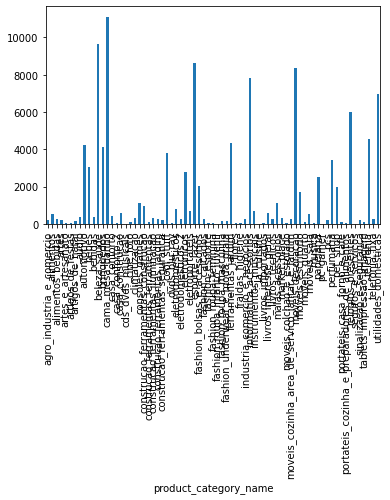

In [ ]:
# Graficamos, puede ser util

Frecuencias.plot(kind = 'bar')

A partir de eso, puedo ver que hay unas categorias de productos que reciben más ventas que otros, seria interesante ver que dicen las reseñas de esos productos y ver si genera un engagement

In [ ]:
Frecuencias.sort_values().tail(10)

product_category_name
automotivo                 4235
ferramentas_jardim         4347
telefonia                  4545
relogios_presentes         5991
utilidades_domesticas      6964
informatica_acessorios     7827
moveis_decoracao           8334
esporte_lazer              8641
beleza_saude               9670
cama_mesa_banho           11115
Name: order_id, dtype: int64

<AxesSubplot:xlabel='product_category_name'>

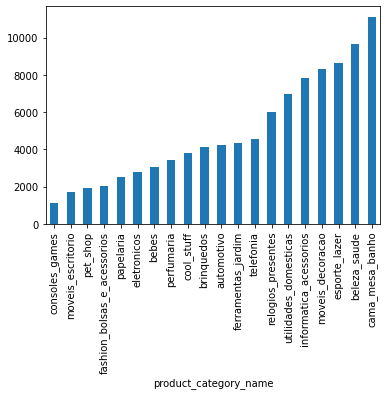

In [ ]:
#20 Productos más vendidos

Frecuencias.sort_values().tail(20).plot(kind = 'bar')

In [ ]:
frec = pd.DataFrame(Frecuencias)

frec

,order_id
product_category_name,
agro_industria_e_comercio,212
alimentos,510
alimentos_bebidas,278
artes,209
artes_e_artesanato,24
...,...
sinalizacao_e_seguranca,199
tablets_impressao_imagem,83
telefonia,4545


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=be227019-db34-4793-a64f-21e28b13a8e3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>